In [15]:
import numpy as np
import pandas as pd
from ipydatagrid import DataGrid
import matplotlib.pyplot as plt
import datetime as datetime_module
from datetime import datetime

#### ETTh1 Section

In [80]:
# ETTh1 Settings
cyclenet_folder = "C:/Users/pinyo/OneDrive/_ResearchLabs/TimeSeries/CycleNet-main"
output_folder = f"{cyclenet_folder}/results/ETTh1_seq_336_pred_96_cycle_24_CycleNet_ETTh1_ftM_sl336_pl96_cycle24_linear_seed2024"
column_names = ["HUFL",	"HULL",	"MUFL",	"MULL",	"LUFL",	"LULL",	"OT"]

In [81]:
a = np.load(file=f"{output_folder}/real_prediction.npy")
print(a.shape)
print(a[0, 0, :])

(1, 96, 7)
[ 0.47847039 -0.45954347  0.50343645 -0.45488438 -0.03839691 -0.4182746
  0.08717903]


In [82]:
b = np.load(file=f"{output_folder}/inv_scaled_prediction.npy")
print(b.shape)
df_b = pd.DataFrame(b, columns=column_names)
DataGrid(df_b)

(96, 7)


DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_renderer=None, default_render…

#### Sales Forecasting Section

In [86]:
def visualize_forecast(input_seq, forecast_seq=None, title=None, visual_path='./Figures/test.png'):
    """
    Results visualization
    """
    xsize, ysize = 16, 4
    plt.figure(figsize=(xsize, ysize))
    # To make input plot connected with the forecast plot, we append the input with the first value of the forecast.
    input_x = input_seq[0] + [forecast_seq[0][0]]
    input_y = input_seq[1] + [forecast_seq[1][0]]
    plt.plot(input_x, input_y, label='Input', linewidth=1, linestyle='-', color='green', marker=" ")
    
    if forecast_seq is not None:
        plt.plot(forecast_seq[0], forecast_seq[1], label='Forecast', linewidth=1, linestyle='--', color='blue', marker=' ')
    plt.legend()
    plt.xticks(rotation=60)
    plt.title(title)
    plt.ylabel("Sales")
    plt.xlabel("Date")
    
    plt.savefig(visual_path, bbox_inches='tight')
    plt.show()
    plt.close()


def visualize_forecast2(input_seq, forecast_seq1, forecast_seq2, title=None, visual_path='./Figures/test.png'):
    """
    Results visualization
    """
    xsize, ysize = 16, 4
    plt.figure(figsize=(xsize, ysize))
    # To make input plot connected with the forecast plot, we append the input with the first value of the forecast.
    input_x = input_seq[0] + [forecast_seq1[0][0]]
    input_y = input_seq[1] + [forecast_seq1[1][0]]
    plt.plot(input_x, input_y, label='Input', linewidth=1, linestyle='-', color='green', marker=" ")

    forecast_x1 = forecast_seq1[0] + [forecast_seq2[0][0]]
    forecast_y1 = forecast_seq1[1] + [forecast_seq2[1][0]]
    plt.plot(forecast_x1, forecast_y1, label='Forecast1', linewidth=1, linestyle='--', color='blue', marker=' ')
    
    plt.plot(forecast_seq2[0], forecast_seq2[1], label='Forecast2', linewidth=1, linestyle='--', color='orange', marker=' ')

    plt.legend()
    plt.xticks(rotation=60)
    plt.title(title)
    plt.ylabel("Sales")
    plt.xlabel("Date")
    
    plt.savefig(visual_path, bbox_inches='tight')
    plt.show()
    plt.close()


def visualize_forecast3(input_seq, forecast_seqs, title=None, visual_path='./Figures/test.png', show=True):
    """
    Results visualization, applicable with three or more prediction batches
    """
    num_forecast_seqs = len(forecast_seqs)
    assert num_forecast_seqs > 1

    xsize, ysize = 16, 4
    plt.figure(figsize=(xsize, ysize))
    # To make input plot connected with the forecast plot, we append the input with the first value of the forecast.
    forecast_seq1 = forecast_seqs[0]
    input_x = input_seq[0] + [forecast_seq1[0][0]]
    input_y = input_seq[1] + [forecast_seq1[1][0]]
    plt.plot(input_x, input_y, label='Input', linewidth=1, linestyle='-', color='green', marker=" ")

    colors = ['blue', 'orange', 'cyan', 'olive', 'pink', 'teal', 'maroon']
    for seq_id in range(num_forecast_seqs - 1):
        forecast_seq1, forecast_seq2 = forecast_seqs[seq_id], forecast_seqs[seq_id+1]
        forecast_x1 = forecast_seq1[0] + [forecast_seq2[0][0]]
        forecast_y1 = forecast_seq1[1] + [forecast_seq2[1][0]]
        plt.plot(forecast_x1, forecast_y1, label=f'Forecast{seq_id+1}', 
                 linewidth=1, linestyle='--', color=colors[seq_id], marker=' ')
    
    plt.plot(forecast_seq2[0], forecast_seq2[1], label=f'Forecast{num_forecast_seqs}', linewidth=1, linestyle='--', 
             color=colors[num_forecast_seqs-1], marker=' ')

    plt.legend()
    plt.xticks(rotation=60)
    plt.title(title)
    plt.ylabel("Sales")
    plt.xlabel("Date")
    
    plt.savefig(visual_path, bbox_inches='tight')
    if show:
        plt.show()
    plt.close()

In [92]:
# 50 Items x 10 Stores Settings
cyclenet_folder = "C:/Users/pinyo/OneDrive/_ResearchLabs/TimeSeries/CycleNet-main"
output_folder = f"{cyclenet_folder}/results/SalesDoubleMultivarAll_seq_400_pred_98_CycleNet_Sales_ftM_sl400_pl98_cycle7_mlp_seed2024"
output_path1 = f"{output_folder}/sales_orig_scaled_prediction_batch1.npy"  # no date column
output_path2 = f"{output_folder}/sales_orig_scaled_prediction_batch2.npy"  # no date column
output_path3 = f"{output_folder}/sales_orig_scaled_prediction_batch3.npy"  # no date column
output_path4 = f"{output_folder}/sales_orig_scaled_prediction_batch4.npy"  # no date column

input_folder = "C:/Users/pinyo/OneDrive/Data/Gosoft/demand-forecasting"
input_path = f"{input_folder}/multivar_test_input_batch1.csv"  # Contain date column

column_names = []
for item in range(1, 51):
    for store in range(1, 11):
        column_names.append(f"it{item}_st{store}")

In [94]:
c = np.load(file=output_path4)
print(c.shape)
df_c = pd.DataFrame(c, columns=column_names)
DataGrid(df_c)

df_c.to_csv(f"{output_folder}/out_batch4.csv")

(98, 500)


In [24]:
def gen_date_list(prev_date, num_dates):
    """Generate a list of consecutive dates coming right after prev_date by upto num_dates."""
    one_day = datetime_module.timedelta(days=1)
    date_list = []
    curr_date = prev_date + one_day
    for i in range(num_dates):
        date_list.append(curr_date)
        curr_date += one_day

    return date_list

[datetime.date(2018, 1, 1), datetime.date(2018, 1, 2), datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5), datetime.date(2018, 1, 6), datetime.date(2018, 1, 7), datetime.date(2018, 1, 8), datetime.date(2018, 1, 9), datetime.date(2018, 1, 10), datetime.date(2018, 1, 11), datetime.date(2018, 1, 12), datetime.date(2018, 1, 13), datetime.date(2018, 1, 14), datetime.date(2018, 1, 15), datetime.date(2018, 1, 16), datetime.date(2018, 1, 17), datetime.date(2018, 1, 18), datetime.date(2018, 1, 19), datetime.date(2018, 1, 20), datetime.date(2018, 1, 21), datetime.date(2018, 1, 22), datetime.date(2018, 1, 23), datetime.date(2018, 1, 24), datetime.date(2018, 1, 25), datetime.date(2018, 1, 26), datetime.date(2018, 1, 27), datetime.date(2018, 1, 28), datetime.date(2018, 1, 29), datetime.date(2018, 1, 30), datetime.date(2018, 1, 31), datetime.date(2018, 2, 1), datetime.date(2018, 2, 2), datetime.date(2018, 2, 3), datetime.date(2018, 2, 4), datetime.date(2018, 2, 5), datet

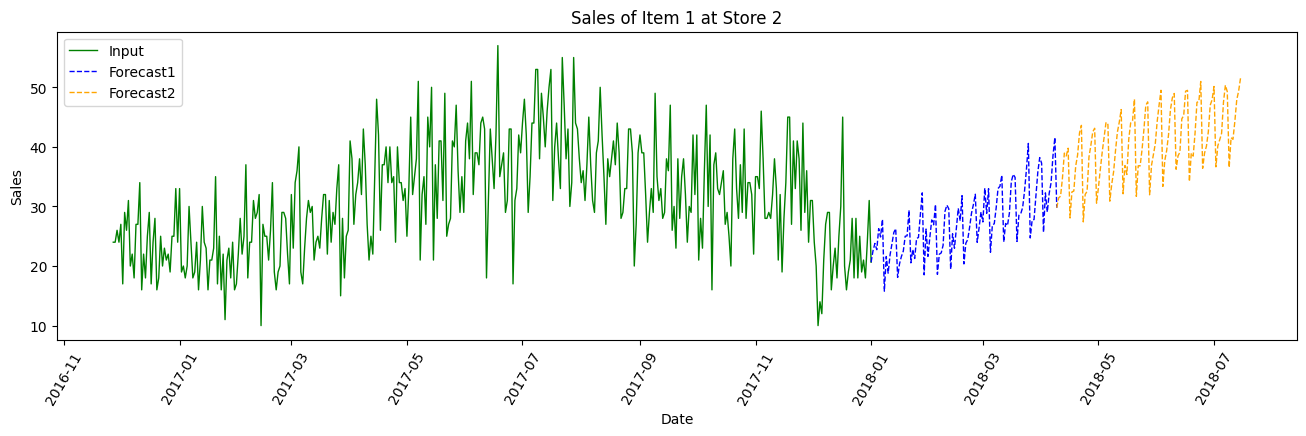

[80, 72, 86, 82, 65, 62, 64, 78, 44, 49, 60, 64, 61, 73, 77, 51, 52, 59, 71, 54, 59, 67, 38, 51, 51, 72, 65, 55, 69, 47, 62, 41, 63, 50, 63, 65, 45, 50, 38, 72, 49, 64, 67, 52, 64, 48, 55, 66, 51, 81, 49, 47, 57, 60, 63, 63, 65, 46, 50, 48, 54, 51, 57, 55, 46, 55, 41, 76, 75, 56, 76, 51, 71, 60, 62, 68, 76, 79, 49, 57, 44, 72, 72, 71, 86, 47, 57, 66, 71, 60, 77, 85, 49, 47, 70, 94, 73, 83, 90, 63, 64, 93, 83, 65, 87, 101, 63, 76, 76, 64, 73, 79, 96, 55, 69, 81, 72, 78, 83, 81, 57, 75, 65, 94, 76, 97, 109, 62, 94, 72, 71, 104, 112, 121, 74, 76, 90, 75, 122, 98, 117, 70, 63, 91, 95, 92, 82, 103, 68, 84, 64, 88, 103, 86, 109, 75, 97, 79, 92, 96, 115, 115, 85, 87, 98, 81, 79, 99, 96, 78, 88, 95, 102, 100, 118, 117, 73, 93, 79, 81, 95, 101, 119, 61, 85, 93, 116, 119, 128, 121, 67, 95, 93, 101, 110, 126, 110, 76, 102, 84, 105, 111, 150, 118, 73, 89, 103, 98, 90, 123, 116, 75, 104, 100, 98, 100, 131, 129, 83, 105, 100, 121, 117, 115, 135, 84, 109, 91, 88, 131, 137, 135, 71, 79, 109, 118, 117,

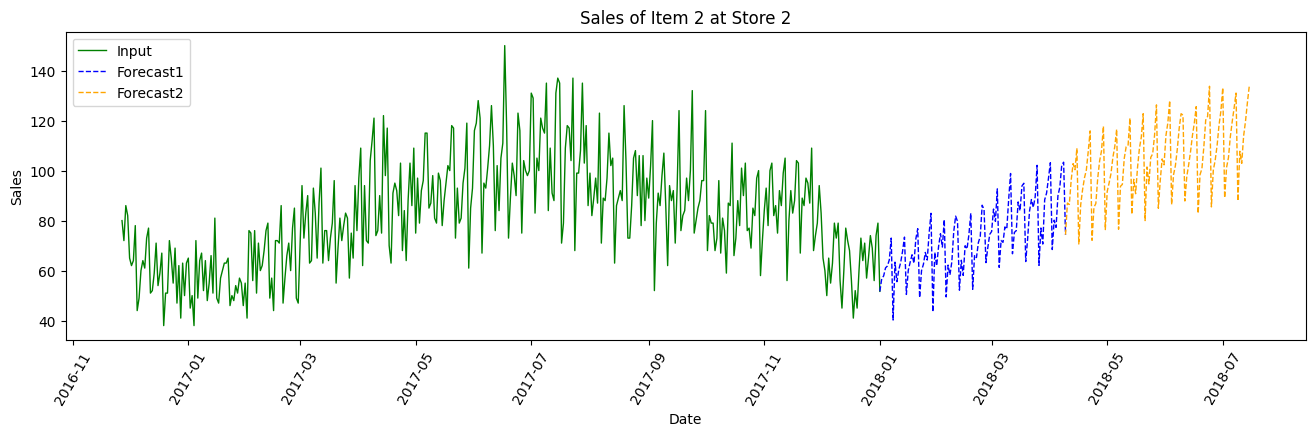

[58, 40, 45, 50, 38, 35, 49, 48, 33, 38, 27, 45, 48, 41, 44, 34, 31, 39, 33, 45, 42, 47, 33, 36, 33, 39, 41, 47, 48, 34, 29, 28, 41, 49, 57, 43, 25, 27, 33, 43, 33, 49, 40, 36, 33, 36, 38, 35, 33, 41, 22, 35, 32, 42, 34, 46, 45, 35, 33, 38, 45, 48, 39, 48, 40, 32, 50, 40, 47, 47, 47, 23, 32, 42, 44, 41, 37, 49, 38, 36, 44, 43, 48, 43, 48, 33, 30, 32, 36, 49, 47, 63, 30, 35, 40, 49, 48, 54, 55, 44, 54, 46, 47, 48, 61, 63, 40, 39, 49, 39, 64, 59, 67, 33, 45, 51, 43, 51, 42, 46, 40, 40, 40, 50, 53, 56, 61, 44, 52, 56, 57, 51, 69, 64, 38, 42, 56, 60, 55, 68, 61, 56, 46, 50, 51, 56, 63, 79, 45, 57, 64, 49, 61, 67, 64, 41, 70, 56, 69, 55, 63, 65, 42, 39, 61, 53, 61, 65, 66, 49, 55, 64, 60, 61, 64, 73, 40, 58, 46, 57, 82, 59, 65, 47, 53, 59, 70, 72, 78, 78, 67, 71, 79, 63, 71, 69, 57, 40, 47, 54, 59, 64, 71, 66, 54, 52, 72, 84, 69, 74, 62, 40, 65, 54, 68, 62, 74, 72, 62, 63, 62, 73, 82, 76, 77, 39, 58, 66, 73, 67, 71, 75, 45, 59, 55, 76, 75, 71, 89, 55, 63, 58, 60, 63, 63, 65, 56, 55, 59, 57,

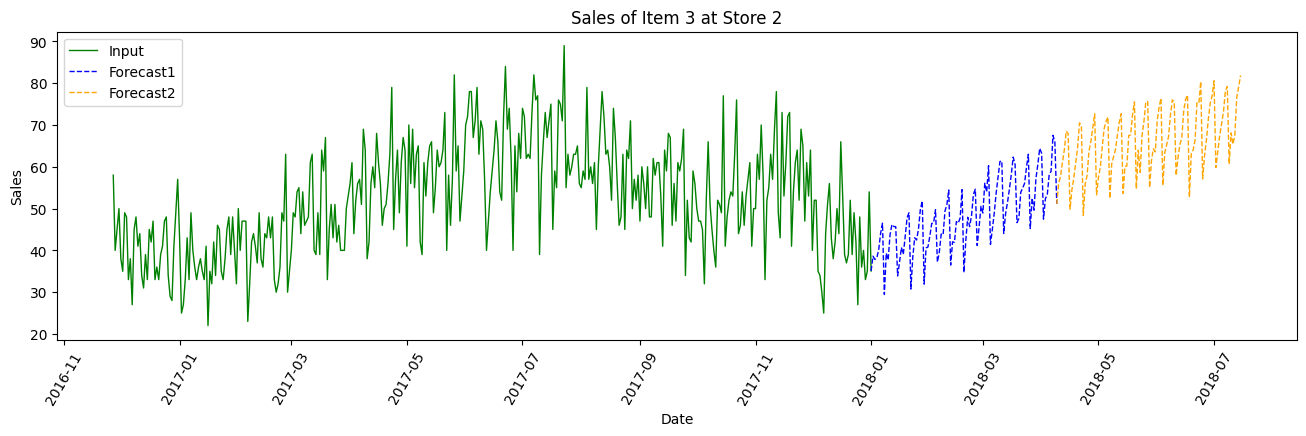

[47, 21, 35, 33, 21, 29, 14, 20, 20, 25, 23, 29, 19, 23, 21, 19, 27, 17, 25, 30, 29, 30, 15, 20, 16, 25, 23, 25, 37, 27, 17, 19, 19, 31, 26, 28, 19, 23, 13, 19, 24, 14, 26, 21, 25, 20, 14, 25, 26, 29, 14, 23, 19, 28, 23, 24, 25, 22, 23, 19, 27, 17, 21, 19, 17, 32, 19, 24, 24, 29, 29, 19, 15, 15, 21, 23, 30, 25, 27, 23, 24, 24, 25, 31, 26, 18, 24, 20, 27, 28, 34, 28, 21, 35, 19, 28, 33, 37, 37, 27, 25, 33, 16, 29, 34, 36, 30, 32, 21, 27, 23, 35, 41, 31, 26, 30, 24, 26, 34, 37, 16, 22, 26, 29, 25, 33, 42, 32, 20, 34, 25, 33, 42, 44, 30, 34, 35, 19, 29, 44, 37, 26, 33, 43, 25, 37, 39, 39, 23, 30, 24, 38, 35, 49, 47, 22, 41, 33, 31, 38, 39, 41, 27, 37, 38, 32, 45, 40, 38, 26, 36, 37, 42, 35, 47, 46, 22, 36, 29, 34, 39, 43, 39, 32, 24, 35, 38, 48, 41, 52, 33, 39, 43, 35, 53, 53, 38, 32, 29, 42, 38, 38, 42, 44, 39, 36, 29, 37, 56, 41, 41, 32, 26, 41, 36, 31, 50, 50, 31, 37, 39, 35, 43, 39, 43, 32, 35, 26, 30, 45, 44, 61, 31, 38, 35, 42, 40, 38, 50, 35, 40, 42, 24, 42, 44, 62, 26, 31, 38, 22,

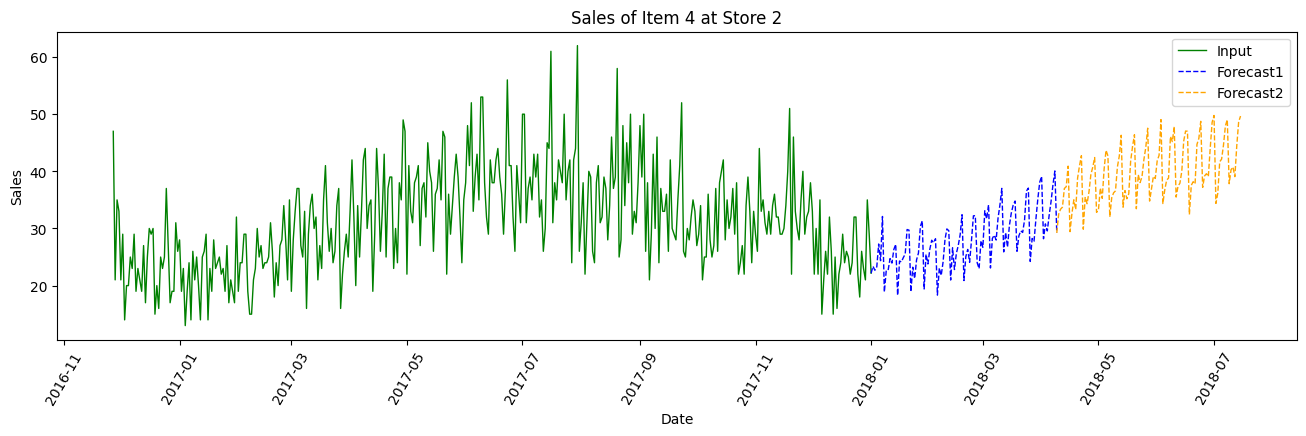

[32, 26, 23, 23, 19, 13, 26, 19, 10, 19, 19, 21, 30, 20, 15, 15, 16, 14, 18, 12, 23, 20, 9, 23, 19, 15, 18, 29, 16, 16, 16, 22, 22, 20, 29, 24, 8, 18, 23, 19, 16, 13, 18, 16, 20, 14, 14, 16, 13, 28, 17, 22, 24, 23, 27, 21, 25, 16, 21, 17, 14, 17, 27, 20, 17, 18, 19, 25, 18, 21, 34, 13, 22, 18, 15, 22, 13, 21, 17, 19, 21, 13, 22, 23, 28, 6, 12, 14, 24, 17, 29, 16, 13, 12, 20, 9, 29, 35, 27, 14, 19, 30, 26, 25, 21, 28, 14, 13, 23, 17, 27, 24, 32, 18, 21, 29, 27, 23, 38, 24, 12, 26, 24, 23, 25, 27, 32, 20, 28, 24, 26, 36, 27, 33, 22, 21, 25, 35, 25, 29, 32, 18, 28, 38, 15, 35, 22, 46, 32, 24, 29, 25, 31, 34, 28, 22, 23, 34, 32, 43, 31, 35, 17, 29, 22, 34, 39, 29, 38, 33, 21, 34, 33, 27, 30, 41, 18, 28, 27, 27, 38, 30, 36, 25, 31, 29, 31, 32, 42, 44, 23, 22, 36, 33, 45, 41, 43, 21, 30, 28, 25, 46, 31, 36, 19, 22, 25, 30, 35, 28, 43, 30, 30, 28, 36, 26, 34, 45, 30, 38, 24, 34, 46, 29, 49, 23, 39, 41, 28, 36, 50, 40, 25, 40, 27, 28, 39, 47, 41, 26, 34, 36, 34, 36, 45, 49, 25, 31, 16, 31, 26,

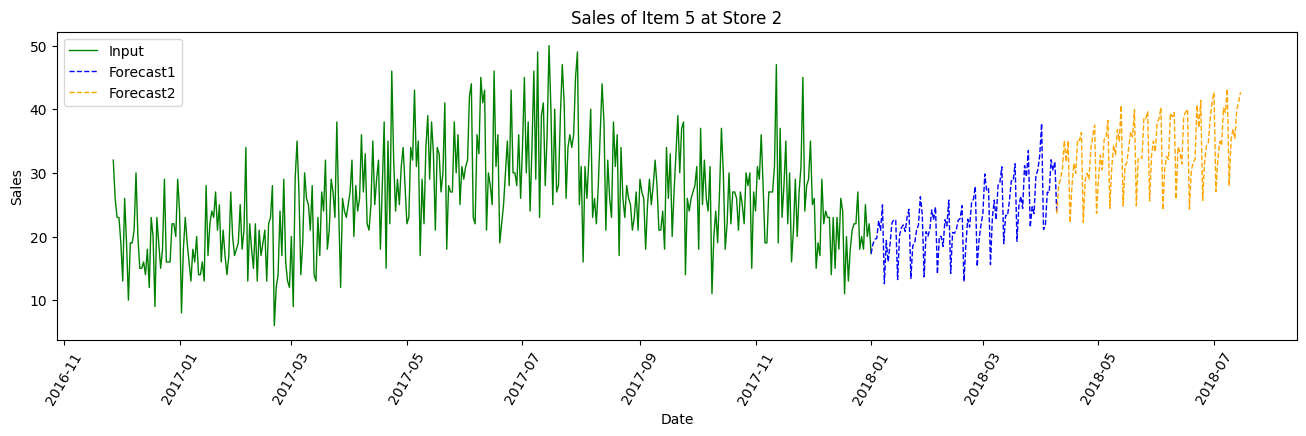

[113, 71, 86, 87, 57, 52, 80, 66, 50, 56, 52, 69, 53, 61, 82, 50, 65, 55, 56, 61, 62, 89, 56, 61, 56, 56, 51, 79, 78, 41, 58, 71, 68, 54, 77, 62, 38, 69, 55, 72, 57, 61, 76, 43, 55, 61, 57, 52, 60, 69, 46, 49, 69, 64, 59, 82, 67, 44, 45, 54, 58, 62, 72, 73, 42, 57, 58, 66, 66, 65, 69, 40, 71, 51, 63, 67, 85, 67, 53, 60, 51, 61, 68, 72, 74, 55, 63, 57, 60, 66, 70, 75, 52, 64, 66, 83, 82, 89, 80, 71, 77, 65, 68, 94, 80, 103, 67, 66, 65, 87, 85, 100, 95, 55, 71, 66, 80, 81, 71, 101, 58, 66, 67, 65, 75, 104, 114, 72, 78, 76, 78, 80, 92, 120, 101, 69, 81, 72, 91, 114, 90, 84, 80, 81, 85, 100, 113, 108, 68, 91, 90, 80, 100, 116, 120, 62, 89, 88, 68, 125, 103, 121, 76, 88, 73, 83, 102, 89, 133, 69, 85, 100, 94, 117, 119, 115, 79, 94, 86, 89, 106, 121, 116, 88, 94, 78, 84, 109, 110, 145, 88, 81, 97, 111, 90, 115, 123, 70, 99, 74, 107, 108, 121, 136, 82, 106, 81, 80, 108, 131, 115, 86, 85, 95, 123, 109, 127, 132, 87, 101, 102, 114, 96, 98, 111, 96, 94, 111, 110, 116, 114, 139, 87, 93, 97, 91, 1

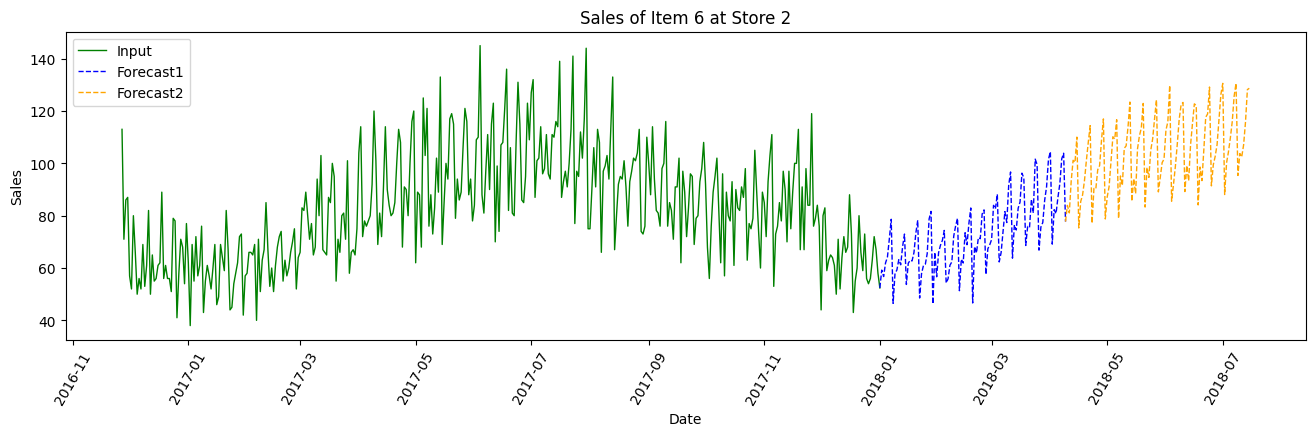

[90, 80, 92, 85, 59, 64, 64, 72, 45, 46, 72, 60, 75, 65, 72, 42, 37, 58, 83, 71, 61, 87, 49, 47, 61, 57, 55, 89, 64, 58, 57, 53, 57, 53, 62, 66, 48, 59, 48, 54, 71, 62, 79, 46, 57, 58, 55, 55, 74, 77, 47, 55, 46, 43, 68, 62, 72, 30, 59, 64, 49, 67, 74, 55, 48, 52, 61, 58, 62, 64, 79, 39, 54, 73, 64, 56, 72, 72, 49, 57, 48, 68, 66, 81, 75, 45, 60, 55, 71, 64, 73, 77, 43, 49, 75, 70, 98, 82, 81, 62, 59, 63, 78, 75, 95, 102, 64, 85, 70, 89, 83, 72, 96, 69, 83, 66, 75, 83, 99, 76, 66, 76, 77, 56, 82, 93, 102, 84, 73, 74, 98, 109, 110, 102, 56, 69, 96, 98, 82, 92, 96, 59, 73, 60, 99, 82, 102, 96, 79, 76, 63, 76, 109, 98, 92, 73, 103, 85, 106, 99, 116, 124, 91, 76, 97, 106, 107, 118, 114, 49, 90, 113, 88, 96, 122, 130, 75, 95, 97, 103, 95, 90, 98, 71, 79, 80, 104, 106, 110, 122, 83, 100, 97, 95, 96, 105, 93, 74, 103, 102, 105, 97, 115, 127, 84, 98, 89, 111, 112, 108, 123, 79, 90, 102, 84, 119, 115, 130, 93, 101, 104, 112, 95, 128, 117, 83, 99, 101, 103, 128, 126, 109, 104, 89, 84, 116, 114, 

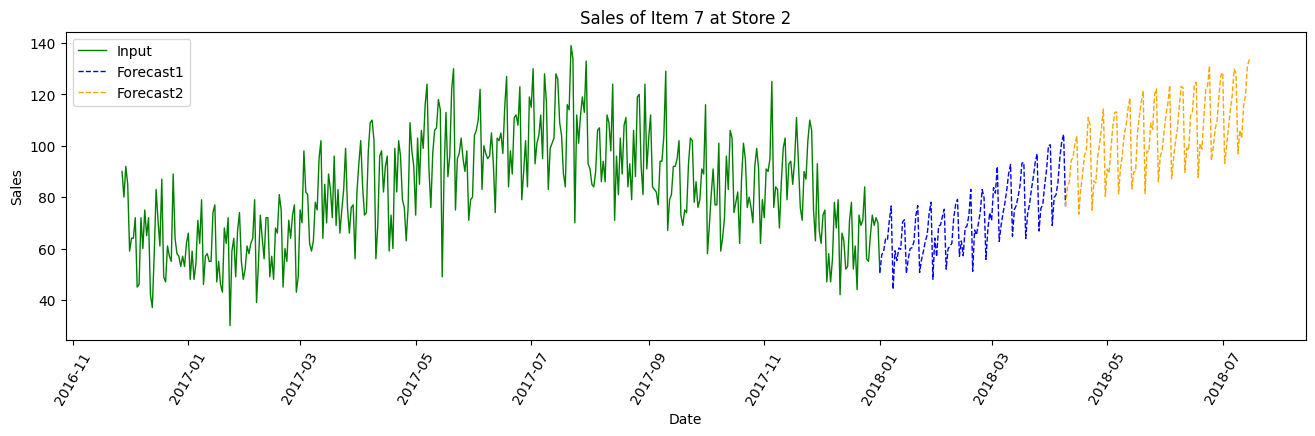

[129, 70, 103, 106, 60, 72, 86, 99, 70, 68, 85, 87, 86, 105, 112, 66, 87, 77, 88, 88, 92, 98, 69, 70, 75, 76, 76, 83, 88, 54, 81, 67, 95, 104, 83, 82, 59, 74, 58, 65, 88, 102, 92, 62, 66, 67, 68, 72, 78, 93, 46, 69, 65, 62, 99, 74, 98, 63, 80, 69, 61, 63, 91, 75, 65, 61, 82, 84, 90, 95, 106, 75, 70, 84, 74, 103, 88, 90, 61, 75, 67, 69, 92, 94, 88, 73, 80, 80, 83, 93, 98, 97, 56, 81, 114, 94, 114, 106, 92, 76, 90, 98, 107, 118, 89, 122, 78, 98, 100, 100, 96, 105, 93, 89, 88, 100, 93, 108, 116, 123, 85, 105, 98, 107, 94, 131, 146, 82, 104, 97, 117, 121, 142, 161, 95, 106, 102, 113, 116, 120, 129, 93, 100, 104, 125, 110, 129, 144, 85, 118, 94, 100, 138, 161, 136, 93, 117, 119, 134, 128, 143, 134, 101, 108, 121, 135, 137, 147, 145, 101, 119, 109, 126, 127, 155, 160, 109, 102, 115, 135, 128, 140, 159, 104, 106, 132, 138, 148, 146, 131, 123, 113, 126, 137, 167, 144, 160, 100, 126, 132, 129, 149, 155, 174, 106, 109, 128, 131, 154, 150, 139, 107, 132, 122, 135, 142, 153, 159, 120, 127, 125, 15

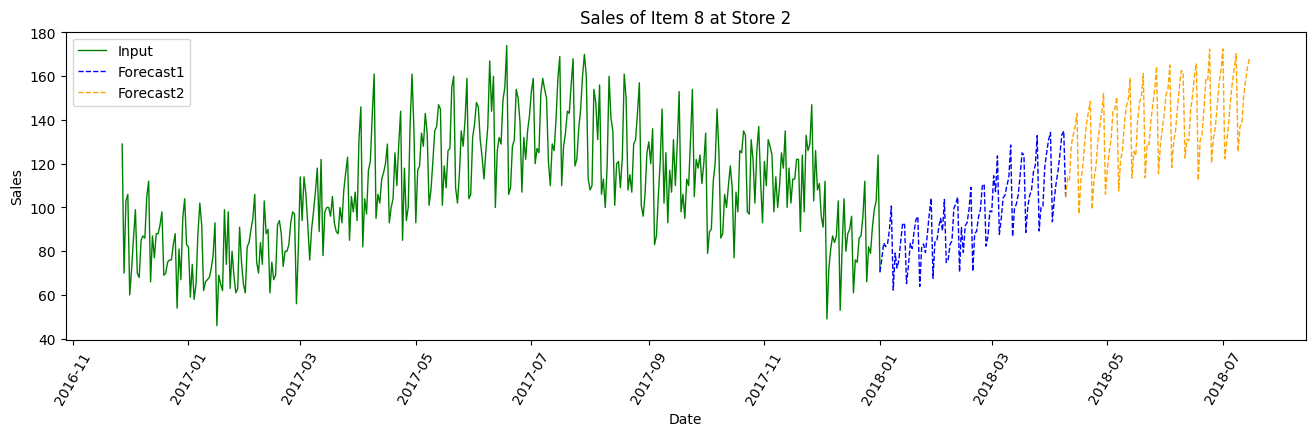

[76, 53, 95, 74, 49, 65, 62, 60, 58, 46, 38, 53, 50, 68, 59, 37, 58, 49, 42, 63, 58, 54, 43, 54, 44, 64, 49, 65, 55, 38, 42, 42, 45, 46, 40, 63, 41, 45, 63, 52, 54, 69, 57, 42, 66, 42, 43, 58, 50, 60, 38, 48, 47, 46, 52, 37, 75, 45, 48, 47, 54, 50, 52, 81, 42, 50, 53, 50, 76, 55, 54, 50, 57, 47, 50, 57, 63, 76, 52, 54, 66, 61, 56, 56, 78, 34, 65, 40, 52, 52, 61, 63, 43, 69, 66, 56, 78, 75, 75, 49, 50, 47, 67, 66, 81, 90, 44, 69, 62, 63, 65, 81, 88, 50, 62, 58, 58, 85, 78, 100, 46, 53, 74, 68, 58, 90, 97, 51, 70, 59, 78, 93, 94, 78, 66, 104, 81, 67, 76, 80, 100, 84, 79, 56, 73, 85, 77, 98, 65, 80, 65, 74, 78, 79, 90, 68, 77, 68, 103, 89, 77, 95, 65, 83, 77, 100, 83, 101, 87, 70, 77, 84, 79, 98, 85, 98, 72, 70, 85, 84, 110, 100, 94, 75, 71, 76, 82, 98, 86, 103, 69, 85, 83, 95, 73, 105, 101, 64, 74, 93, 69, 97, 85, 124, 70, 89, 82, 83, 90, 93, 119, 69, 79, 81, 73, 86, 112, 120, 68, 81, 91, 108, 86, 109, 110, 70, 89, 85, 92, 97, 105, 127, 81, 68, 91, 92, 106, 98, 92, 85, 102, 86, 97, 110, 

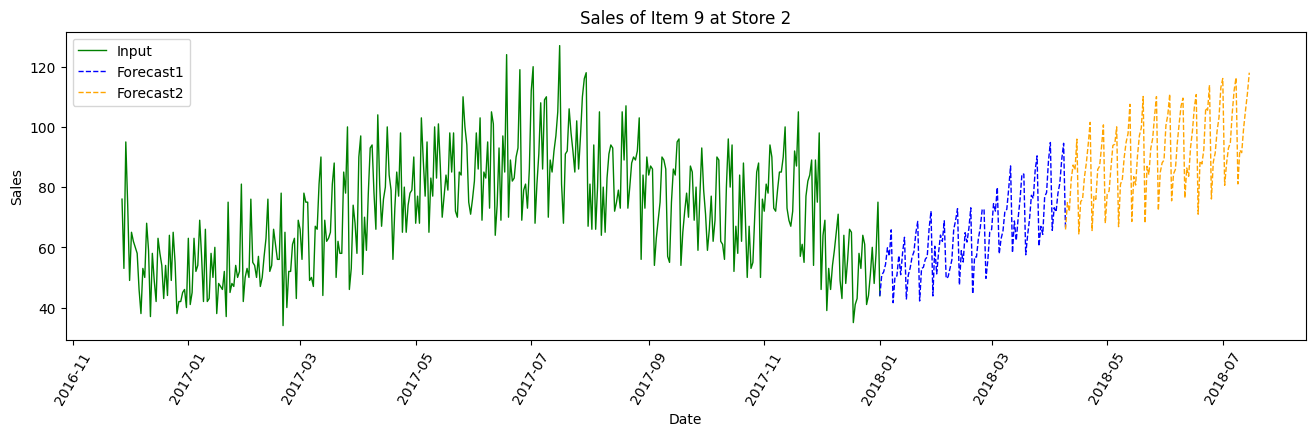

In [79]:
# Two forecast batches
input_df = pd.read_csv(input_path)
last_date = datetime.strptime(input_df['date'].iloc[-1], '%m/%d/%Y').date()
input_dates = [datetime.strptime(input_df['date'].iloc[i], '%m/%d/%Y').date() for i in range(len(input_df))]

preds_np1 = np.load(output_path1)
preds_df1 = pd.DataFrame(preds_np1, columns=column_names)

preds_np2 = np.load(output_path2)
preds_df2 = pd.DataFrame(preds_np2, columns=column_names)

preds_len = len(preds_df1)
preds_dates1 = gen_date_list(prev_date=last_date, num_dates=preds_len)
preds_dates2 = gen_date_list(prev_date=preds_dates1[-1], num_dates=preds_len)
print(preds_dates1)
print(preds_dates2)

for item in range(1, 10):
    for store in range(2, 3):
        plot_title = f"Sales of Item {item} at Store {store}"
        item_col = f"it{item}_st{store}"
        print(input_df[item_col].to_list())
        print(preds_df1[item_col].to_list())
        print(preds_df2[item_col].to_list())

        visualize_forecast2([input_dates, input_df[item_col].to_list()],
                        [preds_dates1, preds_df1[item_col].to_list()], 
                        [preds_dates2, preds_df2[item_col].to_list()], plot_title, 
                        f"{output_folder}/in_out_batch1_2_{item_col}.png")

[datetime.date(2018, 1, 1), datetime.date(2018, 1, 2), datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5), datetime.date(2018, 1, 6), datetime.date(2018, 1, 7), datetime.date(2018, 1, 8), datetime.date(2018, 1, 9), datetime.date(2018, 1, 10), datetime.date(2018, 1, 11), datetime.date(2018, 1, 12), datetime.date(2018, 1, 13), datetime.date(2018, 1, 14), datetime.date(2018, 1, 15), datetime.date(2018, 1, 16), datetime.date(2018, 1, 17), datetime.date(2018, 1, 18), datetime.date(2018, 1, 19), datetime.date(2018, 1, 20), datetime.date(2018, 1, 21), datetime.date(2018, 1, 22), datetime.date(2018, 1, 23), datetime.date(2018, 1, 24), datetime.date(2018, 1, 25), datetime.date(2018, 1, 26), datetime.date(2018, 1, 27), datetime.date(2018, 1, 28), datetime.date(2018, 1, 29), datetime.date(2018, 1, 30), datetime.date(2018, 1, 31), datetime.date(2018, 2, 1), datetime.date(2018, 2, 2), datetime.date(2018, 2, 3), datetime.date(2018, 2, 4), datetime.date(2018, 2, 5), datet

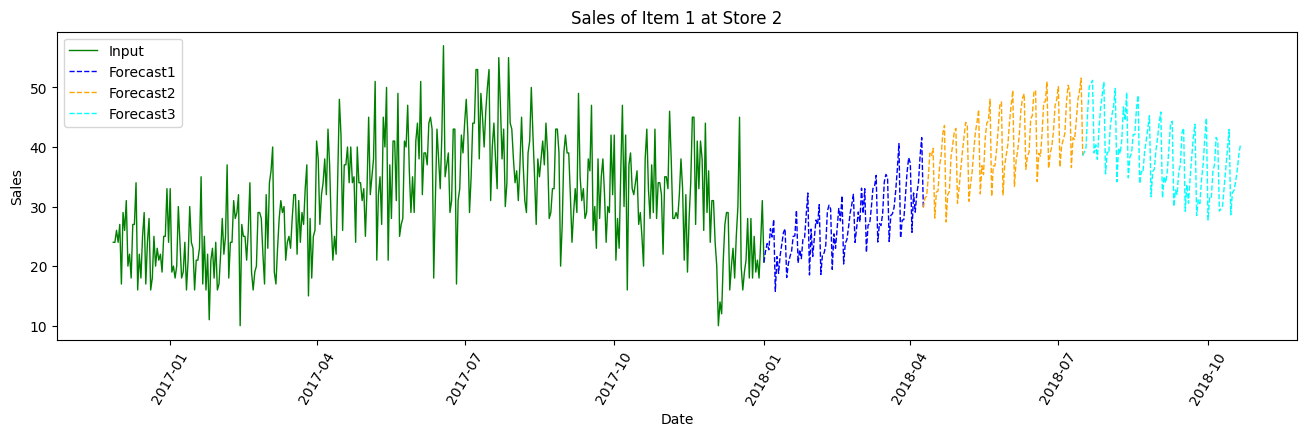

In [95]:
# Three forecast batches
input_df = pd.read_csv(input_path)
last_date = datetime.strptime(input_df['date'].iloc[-1], '%m/%d/%Y').date()
input_dates = [datetime.strptime(input_df['date'].iloc[i], '%m/%d/%Y').date() for i in range(len(input_df))]

preds_np1 = np.load(output_path1)
preds_df1 = pd.DataFrame(preds_np1, columns=column_names)

preds_np2 = np.load(output_path2)
preds_df2 = pd.DataFrame(preds_np2, columns=column_names)

preds_np3 = np.load(output_path3)
preds_df3 = pd.DataFrame(preds_np3, columns=column_names)

preds_len = len(preds_df1)
preds_dates1 = gen_date_list(prev_date=last_date, num_dates=preds_len)
preds_dates2 = gen_date_list(prev_date=preds_dates1[-1], num_dates=preds_len)
preds_dates3 = gen_date_list(prev_date=preds_dates2[-1], num_dates=preds_len)
print(preds_dates1)
print(preds_dates2)
print(preds_dates3)

for item in range(1, 2):
    for store in range(2, 3):
        plot_title = f"Sales of Item {item} at Store {store}"
        item_col = f"it{item}_st{store}"
        print(f"input = {input_df[item_col].to_list()}")
        print(f"preds 1 = {preds_df1[item_col].to_list()}")
        print(f"preds 2 = {preds_df2[item_col].to_list()}")
        print(f"preds 3 = {preds_df3[item_col].to_list()}")

        forecast_seqs = [[preds_dates1, preds_df1[item_col].to_list()],
                         [preds_dates2, preds_df2[item_col].to_list()],
                         [preds_dates3, preds_df3[item_col].to_list()]]
        visualize_forecast3([input_dates, input_df[item_col].to_list()], forecast_seqs, 
                            plot_title, f"{output_folder}/in_out_batch1_2_3_{item_col}.png")

[datetime.date(2018, 1, 1), datetime.date(2018, 1, 2), datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5), datetime.date(2018, 1, 6), datetime.date(2018, 1, 7), datetime.date(2018, 1, 8), datetime.date(2018, 1, 9), datetime.date(2018, 1, 10), datetime.date(2018, 1, 11), datetime.date(2018, 1, 12), datetime.date(2018, 1, 13), datetime.date(2018, 1, 14), datetime.date(2018, 1, 15), datetime.date(2018, 1, 16), datetime.date(2018, 1, 17), datetime.date(2018, 1, 18), datetime.date(2018, 1, 19), datetime.date(2018, 1, 20), datetime.date(2018, 1, 21), datetime.date(2018, 1, 22), datetime.date(2018, 1, 23), datetime.date(2018, 1, 24), datetime.date(2018, 1, 25), datetime.date(2018, 1, 26), datetime.date(2018, 1, 27), datetime.date(2018, 1, 28), datetime.date(2018, 1, 29), datetime.date(2018, 1, 30), datetime.date(2018, 1, 31), datetime.date(2018, 2, 1), datetime.date(2018, 2, 2), datetime.date(2018, 2, 3), datetime.date(2018, 2, 4), datetime.date(2018, 2, 5), datet

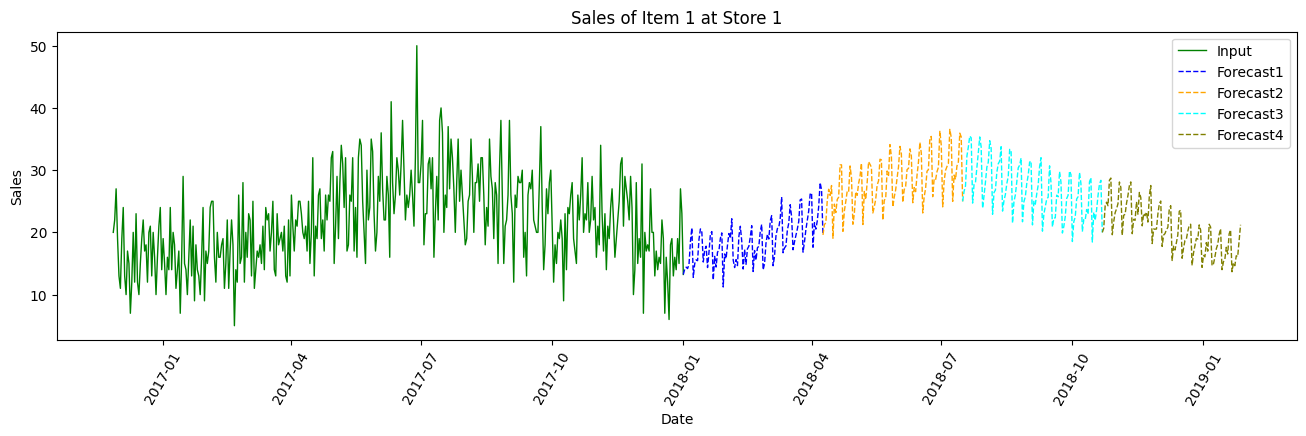

input = [24, 24, 26, 24, 27, 17, 29, 26, 31, 20, 22, 18, 27, 27, 34, 16, 22, 18, 25, 29, 17, 24, 28, 16, 18, 25, 20, 23, 21, 22, 19, 25, 25, 33, 24, 33, 19, 20, 18, 20, 30, 24, 18, 19, 24, 16, 21, 30, 24, 23, 16, 21, 21, 23, 35, 17, 25, 16, 22, 11, 21, 23, 18, 24, 16, 17, 22, 28, 22, 25, 37, 18, 24, 24, 31, 28, 29, 32, 10, 27, 25, 25, 21, 26, 34, 19, 16, 19, 20, 29, 29, 28, 22, 17, 32, 23, 34, 36, 40, 19, 17, 23, 28, 31, 29, 30, 21, 24, 25, 23, 28, 32, 32, 22, 31, 24, 29, 27, 33, 37, 15, 28, 18, 25, 26, 41, 38, 27, 32, 34, 38, 32, 43, 37, 27, 21, 25, 22, 35, 48, 42, 26, 37, 37, 40, 34, 40, 34, 35, 24, 40, 34, 34, 31, 33, 25, 33, 45, 32, 35, 38, 51, 21, 32, 35, 27, 45, 40, 50, 21, 37, 28, 41, 41, 31, 49, 25, 27, 28, 41, 40, 47, 36, 29, 35, 29, 41, 44, 38, 51, 32, 39, 39, 37, 44, 45, 43, 18, 31, 43, 38, 33, 42, 57, 35, 37, 39, 29, 31, 43, 43, 17, 31, 33, 42, 39, 44, 48, 42, 29, 35, 44, 44, 53, 53, 38, 49, 45, 40, 46, 50, 53, 31, 40, 44, 38, 33, 55, 47, 38, 43, 30, 34, 55, 44, 43, 38, 34,

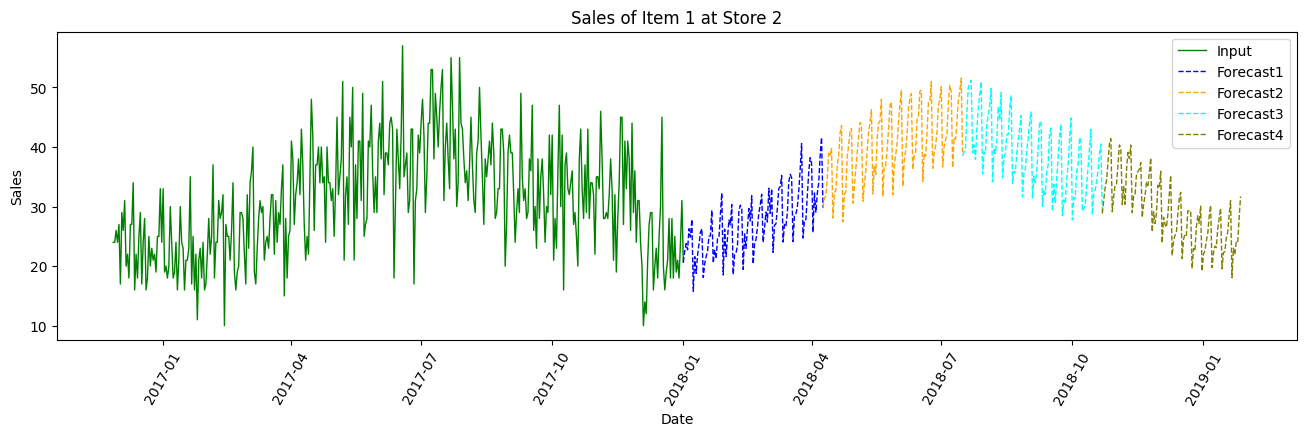

input = [37, 21, 37, 25, 19, 15, 23, 30, 25, 14, 16, 23, 21, 37, 23, 24, 14, 17, 24, 25, 24, 23, 21, 26, 24, 21, 18, 26, 24, 11, 22, 15, 19, 21, 26, 20, 16, 17, 20, 26, 17, 22, 18, 17, 11, 20, 23, 16, 20, 25, 16, 22, 23, 23, 18, 24, 23, 18, 21, 16, 27, 21, 20, 21, 16, 17, 22, 28, 33, 28, 20, 20, 22, 17, 24, 26, 28, 20, 18, 26, 19, 19, 19, 22, 20, 18, 19, 22, 17, 24, 27, 26, 18, 17, 19, 14, 27, 27, 25, 21, 28, 25, 21, 23, 40, 33, 26, 22, 27, 25, 29, 32, 25, 16, 19, 26, 15, 34, 27, 17, 22, 27, 33, 23, 30, 42, 28, 25, 26, 31, 29, 44, 32, 37, 26, 29, 26, 28, 25, 52, 28, 26, 25, 30, 22, 26, 41, 31, 30, 25, 20, 36, 34, 32, 45, 26, 25, 32, 31, 32, 33, 38, 40, 37, 31, 32, 32, 43, 31, 20, 30, 20, 37, 26, 35, 34, 24, 29, 36, 33, 34, 33, 43, 32, 31, 40, 42, 32, 35, 50, 19, 38, 25, 32, 40, 29, 41, 22, 30, 30, 36, 37, 50, 38, 33, 28, 34, 30, 50, 28, 47, 37, 29, 38, 32, 45, 35, 40, 32, 44, 29, 41, 49, 32, 36, 30, 35, 42, 35, 34, 40, 51, 34, 40, 28, 36, 32, 41, 46, 21, 38, 40, 28, 49, 34, 45, 24, 30,

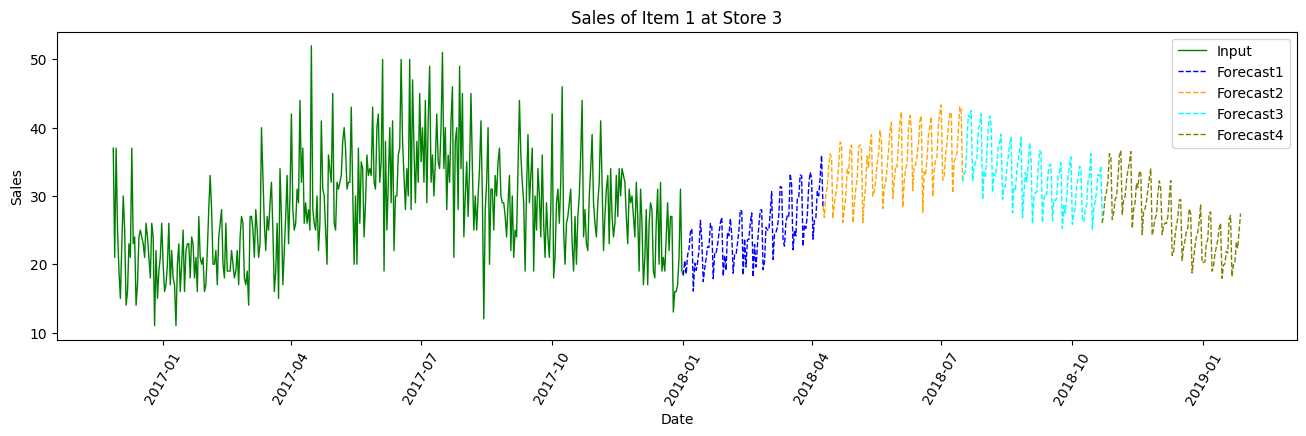

input = [18, 23, 24, 19, 16, 18, 19, 26, 22, 13, 19, 27, 33, 15, 22, 15, 15, 15, 15, 28, 22, 24, 12, 19, 17, 19, 16, 13, 32, 21, 17, 22, 10, 21, 15, 16, 20, 19, 14, 16, 25, 29, 19, 9, 23, 20, 16, 18, 17, 21, 16, 22, 14, 21, 26, 24, 13, 16, 16, 18, 18, 22, 19, 10, 8, 16, 19, 17, 28, 15, 30, 15, 21, 20, 18, 15, 21, 24, 18, 9, 18, 20, 15, 17, 25, 10, 18, 16, 24, 16, 18, 26, 12, 13, 20, 22, 28, 20, 23, 21, 13, 28, 18, 29, 16, 27, 16, 28, 21, 22, 24, 27, 22, 19, 17, 22, 19, 36, 27, 23, 17, 23, 16, 23, 16, 32, 33, 18, 26, 26, 24, 26, 29, 31, 26, 30, 21, 22, 37, 21, 35, 22, 20, 29, 32, 39, 36, 31, 12, 25, 18, 27, 29, 33, 24, 26, 17, 29, 29, 41, 37, 26, 24, 22, 23, 26, 32, 23, 30, 26, 25, 21, 36, 34, 31, 42, 22, 21, 32, 31, 27, 42, 26, 21, 21, 27, 29, 32, 31, 31, 33, 37, 26, 15, 35, 40, 51, 36, 32, 27, 27, 29, 37, 42, 27, 28, 34, 37, 25, 38, 31, 15, 28, 36, 25, 28, 43, 46, 20, 30, 37, 36, 36, 30, 52, 32, 28, 26, 37, 47, 23, 33, 30, 28, 32, 47, 44, 42, 40, 32, 29, 31, 35, 35, 40, 43, 23, 16, 23

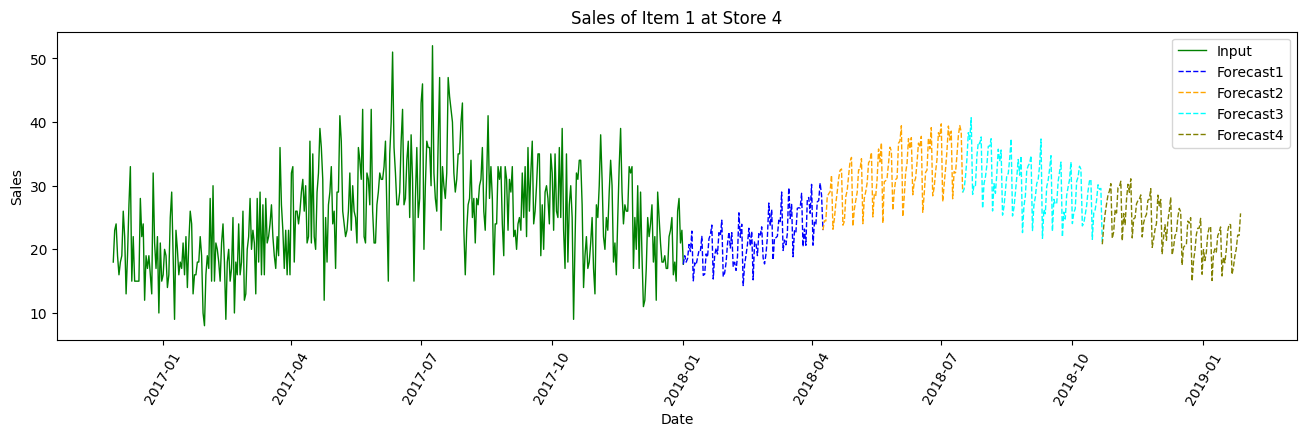

input = [16, 22, 15, 18, 6, 19, 15, 14, 21, 13, 17, 9, 17, 7, 14, 4, 13, 16, 17, 17, 21, 15, 10, 13, 14, 7, 16, 16, 15, 10, 9, 6, 23, 16, 12, 11, 5, 10, 12, 12, 11, 16, 12, 15, 18, 10, 13, 14, 10, 12, 10, 12, 19, 16, 12, 11, 11, 10, 10, 9, 12, 12, 15, 17, 11, 7, 14, 18, 18, 11, 15, 13, 12, 8, 13, 17, 20, 26, 10, 10, 16, 10, 16, 20, 20, 14, 12, 16, 12, 19, 28, 17, 11, 15, 26, 14, 21, 18, 16, 14, 13, 10, 13, 11, 20, 21, 15, 15, 20, 24, 26, 17, 20, 13, 14, 24, 10, 14, 10, 23, 12, 19, 16, 15, 20, 22, 21, 14, 11, 19, 24, 19, 23, 27, 17, 22, 10, 23, 15, 26, 24, 11, 17, 24, 23, 18, 25, 22, 28, 10, 21, 21, 18, 21, 18, 19, 21, 22, 26, 23, 14, 31, 16, 11, 17, 16, 18, 23, 22, 15, 22, 18, 21, 28, 21, 28, 13, 36, 23, 17, 22, 20, 25, 19, 23, 16, 21, 15, 29, 23, 10, 28, 23, 17, 22, 38, 25, 17, 24, 23, 33, 23, 31, 27, 23, 22, 12, 20, 23, 27, 22, 23, 12, 27, 26, 25, 34, 29, 22, 27, 25, 19, 17, 22, 26, 22, 21, 25, 17, 23, 30, 24, 16, 25, 21, 29, 22, 24, 27, 23, 24, 21, 24, 26, 18, 27, 21, 26, 14, 22, 16

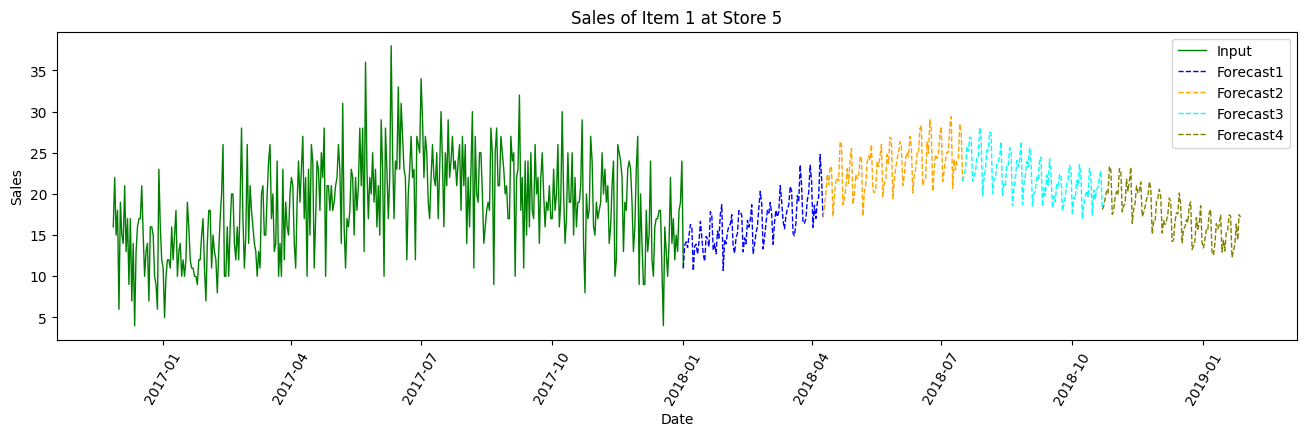

input = [78, 50, 49, 52, 43, 44, 40, 51, 29, 45, 39, 35, 41, 47, 53, 36, 45, 41, 52, 42, 55, 40, 33, 47, 46, 35, 64, 47, 39, 30, 41, 38, 56, 37, 47, 40, 26, 33, 41, 39, 43, 46, 58, 31, 36, 42, 39, 34, 29, 47, 21, 37, 41, 51, 48, 42, 49, 25, 44, 38, 30, 32, 48, 47, 28, 37, 34, 47, 45, 42, 38, 38, 33, 37, 39, 38, 52, 47, 45, 46, 38, 46, 59, 47, 55, 32, 26, 45, 50, 49, 46, 41, 44, 37, 48, 54, 47, 70, 57, 36, 57, 51, 43, 53, 54, 63, 52, 56, 59, 52, 52, 55, 65, 34, 47, 33, 51, 62, 55, 55, 40, 45, 45, 44, 57, 61, 66, 43, 53, 76, 62, 62, 77, 86, 52, 68, 59, 71, 78, 79, 60, 58, 51, 64, 48, 61, 71, 88, 54, 61, 59, 58, 61, 84, 80, 60, 66, 51, 63, 79, 76, 67, 64, 73, 55, 83, 82, 85, 85, 54, 61, 68, 76, 72, 89, 91, 48, 62, 73, 66, 66, 82, 48, 39, 57, 60, 83, 85, 106, 103, 54, 67, 67, 68, 75, 85, 87, 66, 79, 63, 77, 76, 82, 77, 54, 66, 56, 64, 75, 88, 101, 48, 53, 63, 64, 82, 83, 98, 52, 66, 67, 67, 80, 94, 97, 49, 65, 76, 63, 84, 86, 115, 64, 76, 81, 76, 81, 94, 89, 53, 70, 67, 73, 73, 86, 86, 59,

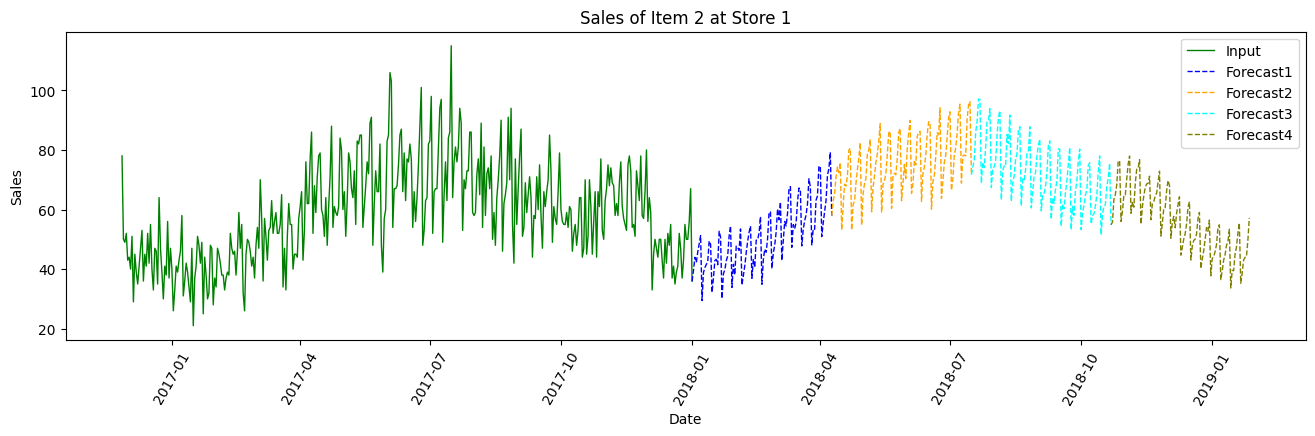

input = [80, 72, 86, 82, 65, 62, 64, 78, 44, 49, 60, 64, 61, 73, 77, 51, 52, 59, 71, 54, 59, 67, 38, 51, 51, 72, 65, 55, 69, 47, 62, 41, 63, 50, 63, 65, 45, 50, 38, 72, 49, 64, 67, 52, 64, 48, 55, 66, 51, 81, 49, 47, 57, 60, 63, 63, 65, 46, 50, 48, 54, 51, 57, 55, 46, 55, 41, 76, 75, 56, 76, 51, 71, 60, 62, 68, 76, 79, 49, 57, 44, 72, 72, 71, 86, 47, 57, 66, 71, 60, 77, 85, 49, 47, 70, 94, 73, 83, 90, 63, 64, 93, 83, 65, 87, 101, 63, 76, 76, 64, 73, 79, 96, 55, 69, 81, 72, 78, 83, 81, 57, 75, 65, 94, 76, 97, 109, 62, 94, 72, 71, 104, 112, 121, 74, 76, 90, 75, 122, 98, 117, 70, 63, 91, 95, 92, 82, 103, 68, 84, 64, 88, 103, 86, 109, 75, 97, 79, 92, 96, 115, 115, 85, 87, 98, 81, 79, 99, 96, 78, 88, 95, 102, 100, 118, 117, 73, 93, 79, 81, 95, 101, 119, 61, 85, 93, 116, 119, 128, 121, 67, 95, 93, 101, 110, 126, 110, 76, 102, 84, 105, 111, 150, 118, 73, 89, 103, 98, 90, 123, 116, 75, 104, 100, 98, 100, 131, 129, 83, 105, 100, 121, 117, 115, 135, 84, 109, 91, 88, 131, 137, 135, 71, 79, 109, 1

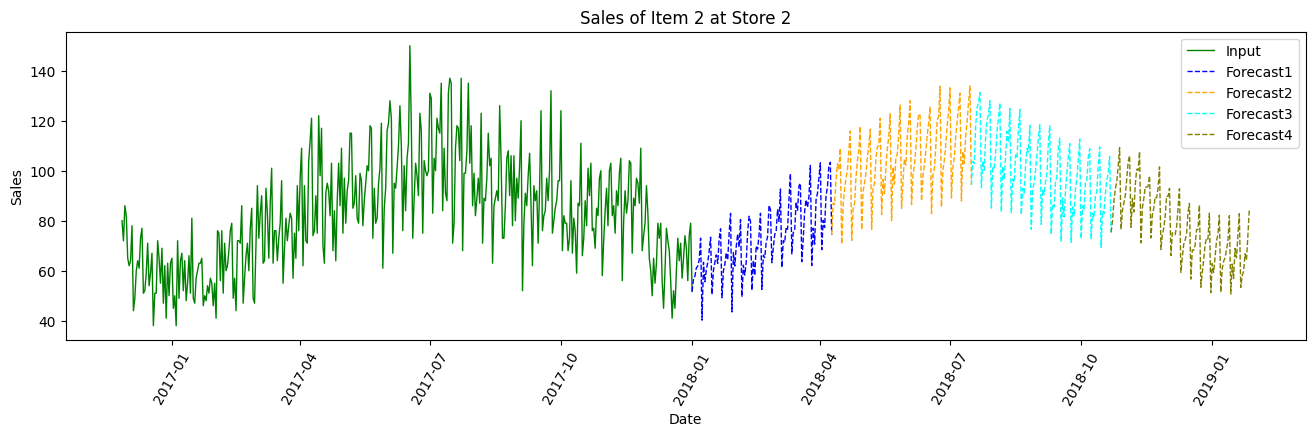

input = [87, 65, 72, 67, 56, 48, 66, 60, 48, 48, 49, 53, 60, 56, 61, 45, 50, 42, 48, 57, 71, 68, 45, 57, 53, 50, 65, 67, 79, 43, 54, 46, 57, 64, 64, 40, 45, 46, 45, 55, 54, 52, 58, 44, 56, 52, 46, 71, 53, 47, 38, 42, 52, 51, 56, 57, 52, 30, 30, 44, 45, 56, 60, 54, 35, 49, 50, 73, 52, 53, 79, 43, 57, 54, 49, 68, 67, 81, 42, 64, 52, 54, 61, 83, 70, 45, 60, 53, 46, 55, 65, 80, 45, 43, 63, 72, 82, 74, 77, 56, 63, 57, 81, 80, 71, 75, 45, 58, 60, 71, 72, 66, 81, 46, 67, 50, 52, 67, 72, 107, 55, 69, 65, 62, 58, 86, 95, 52, 94, 78, 71, 79, 77, 92, 48, 87, 73, 87, 85, 99, 98, 77, 75, 69, 78, 93, 76, 96, 62, 69, 78, 86, 93, 80, 89, 57, 76, 65, 95, 96, 103, 115, 57, 77, 102, 82, 95, 85, 96, 65, 65, 64, 102, 82, 105, 108, 67, 87, 76, 69, 86, 97, 96, 59, 73, 66, 91, 100, 105, 119, 70, 74, 108, 94, 90, 123, 117, 75, 88, 83, 82, 83, 120, 109, 84, 85, 91, 107, 84, 88, 131, 79, 80, 90, 102, 99, 96, 123, 81, 84, 95, 94, 105, 87, 107, 69, 85, 87, 108, 106, 111, 106, 78, 101, 92, 103, 97, 89, 107, 60, 95,

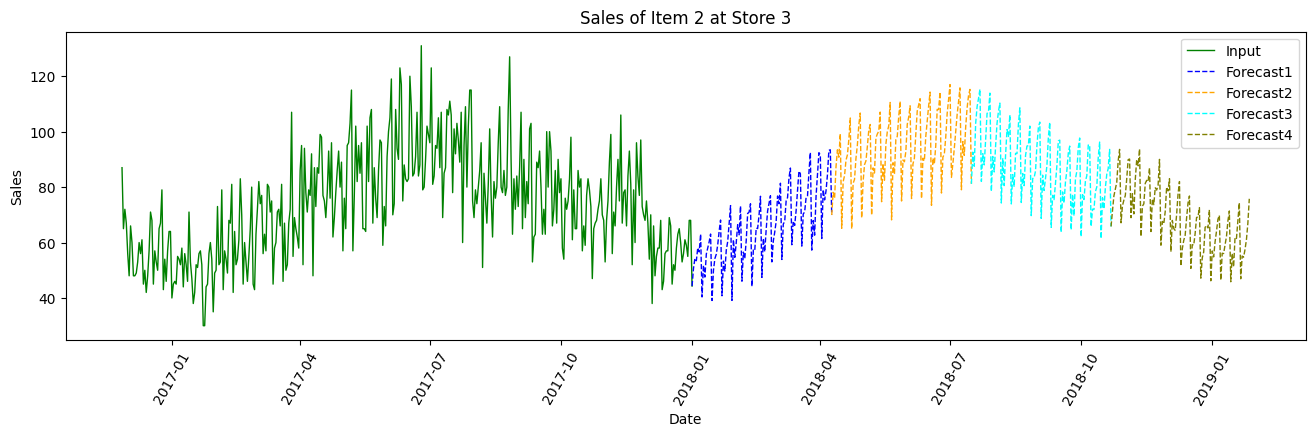

input = [92, 60, 68, 65, 48, 49, 77, 67, 48, 43, 44, 61, 53, 52, 63, 43, 58, 48, 37, 55, 56, 56, 37, 53, 40, 43, 53, 55, 48, 31, 36, 47, 44, 53, 52, 61, 33, 37, 40, 45, 49, 47, 53, 31, 54, 38, 32, 46, 45, 53, 37, 43, 32, 60, 56, 47, 67, 42, 30, 41, 44, 52, 55, 61, 36, 44, 45, 39, 52, 67, 67, 51, 50, 42, 65, 53, 54, 81, 44, 46, 50, 44, 60, 59, 53, 46, 47, 37, 48, 43, 52, 68, 46, 40, 59, 55, 70, 59, 60, 58, 54, 58, 63, 70, 76, 83, 46, 68, 44, 45, 74, 78, 78, 54, 56, 64, 63, 59, 78, 72, 51, 66, 51, 58, 66, 81, 91, 59, 64, 72, 79, 85, 84, 88, 57, 80, 54, 81, 72, 99, 68, 48, 76, 80, 66, 73, 79, 97, 60, 62, 65, 68, 100, 79, 81, 65, 73, 62, 78, 73, 88, 86, 58, 96, 62, 76, 84, 93, 95, 67, 82, 78, 92, 85, 81, 85, 53, 74, 87, 82, 91, 95, 92, 60, 65, 76, 85, 91, 99, 95, 56, 82, 77, 83, 85, 102, 110, 76, 80, 74, 83, 87, 88, 105, 73, 71, 64, 82, 86, 91, 74, 65, 80, 67, 80, 76, 124, 105, 65, 83, 89, 85, 95, 106, 113, 63, 82, 84, 92, 104, 101, 100, 67, 74, 83, 88, 84, 94, 108, 74, 87, 77, 65, 104, 13

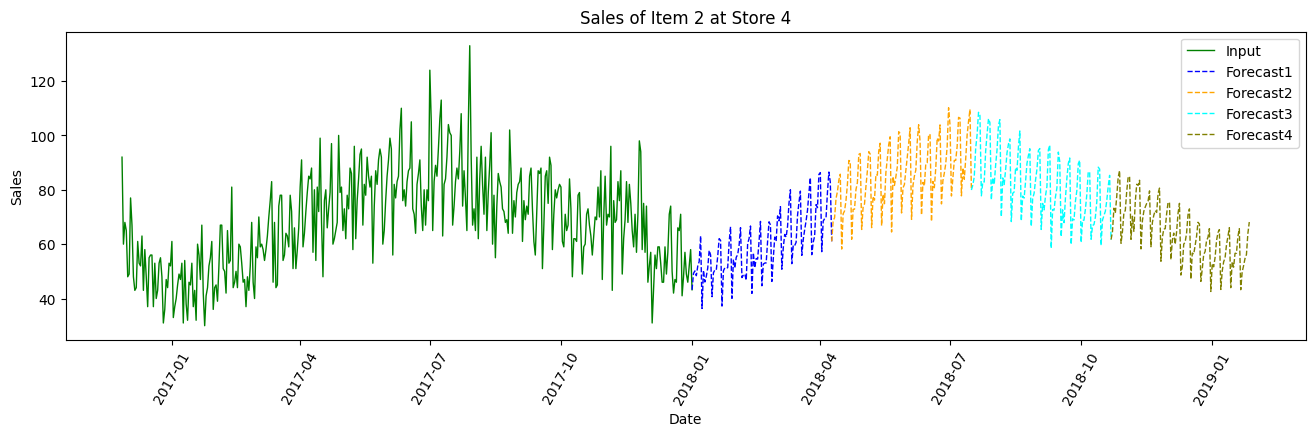

input = [63, 36, 48, 41, 39, 31, 39, 43, 29, 42, 36, 34, 40, 37, 47, 25, 36, 33, 37, 51, 46, 37, 32, 41, 32, 41, 38, 31, 41, 30, 37, 28, 36, 37, 48, 37, 23, 24, 22, 28, 31, 44, 39, 23, 36, 33, 40, 42, 37, 28, 26, 24, 36, 40, 36, 30, 29, 22, 40, 33, 37, 34, 33, 40, 31, 38, 32, 33, 33, 35, 44, 34, 39, 25, 47, 38, 56, 44, 28, 38, 30, 37, 45, 54, 49, 28, 45, 26, 44, 40, 47, 43, 28, 48, 63, 53, 53, 52, 50, 28, 39, 43, 40, 47, 47, 55, 36, 53, 48, 52, 43, 57, 63, 39, 49, 41, 47, 39, 52, 48, 34, 31, 49, 44, 62, 65, 57, 44, 39, 53, 43, 68, 58, 58, 41, 46, 39, 45, 55, 59, 54, 51, 65, 51, 44, 56, 55, 61, 43, 41, 45, 55, 66, 50, 61, 52, 52, 50, 74, 61, 77, 78, 49, 51, 51, 51, 66, 51, 71, 32, 56, 41, 56, 61, 78, 76, 44, 45, 47, 61, 65, 69, 71, 38, 58, 47, 67, 70, 72, 63, 54, 53, 55, 73, 61, 52, 57, 48, 66, 56, 59, 68, 55, 81, 44, 64, 57, 67, 55, 60, 83, 45, 66, 54, 60, 64, 75, 79, 55, 74, 59, 62, 69, 61, 61, 52, 55, 56, 56, 58, 75, 81, 56, 67, 68, 73, 72, 52, 74, 39, 53, 73, 75, 75, 53, 77, 53, 52,

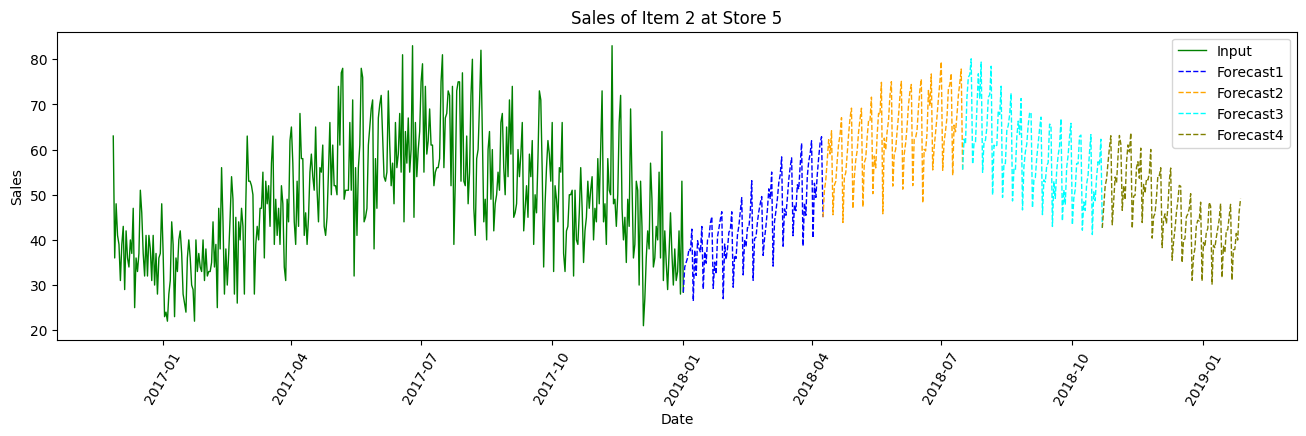

input = [38, 21, 44, 28, 20, 28, 25, 36, 19, 28, 28, 23, 38, 37, 33, 18, 31, 21, 22, 25, 23, 25, 21, 24, 26, 24, 26, 37, 38, 23, 29, 22, 26, 26, 29, 36, 23, 20, 23, 25, 23, 26, 32, 23, 17, 15, 37, 31, 30, 22, 19, 20, 34, 22, 26, 33, 33, 17, 19, 25, 17, 28, 30, 27, 27, 28, 25, 20, 31, 19, 38, 23, 27, 20, 30, 37, 23, 31, 28, 19, 22, 33, 29, 39, 34, 24, 29, 25, 19, 35, 29, 32, 25, 31, 40, 34, 32, 32, 41, 19, 30, 35, 27, 36, 35, 34, 28, 34, 37, 33, 28, 36, 48, 22, 32, 20, 33, 39, 41, 44, 32, 29, 28, 28, 36, 40, 43, 33, 32, 42, 40, 45, 32, 42, 31, 34, 43, 39, 43, 49, 49, 40, 27, 38, 41, 37, 44, 43, 39, 52, 39, 41, 39, 44, 46, 25, 45, 49, 43, 51, 44, 66, 36, 31, 44, 34, 39, 59, 47, 33, 38, 41, 38, 48, 54, 49, 33, 41, 40, 37, 65, 59, 62, 37, 44, 55, 57, 54, 37, 54, 48, 41, 42, 53, 49, 44, 46, 44, 34, 48, 49, 50, 67, 57, 30, 44, 47, 31, 45, 51, 52, 23, 39, 40, 35, 45, 41, 58, 36, 47, 41, 43, 49, 57, 59, 43, 33, 48, 54, 65, 47, 69, 46, 43, 40, 41, 59, 43, 68, 46, 39, 37, 41, 60, 55, 56, 37, 43,

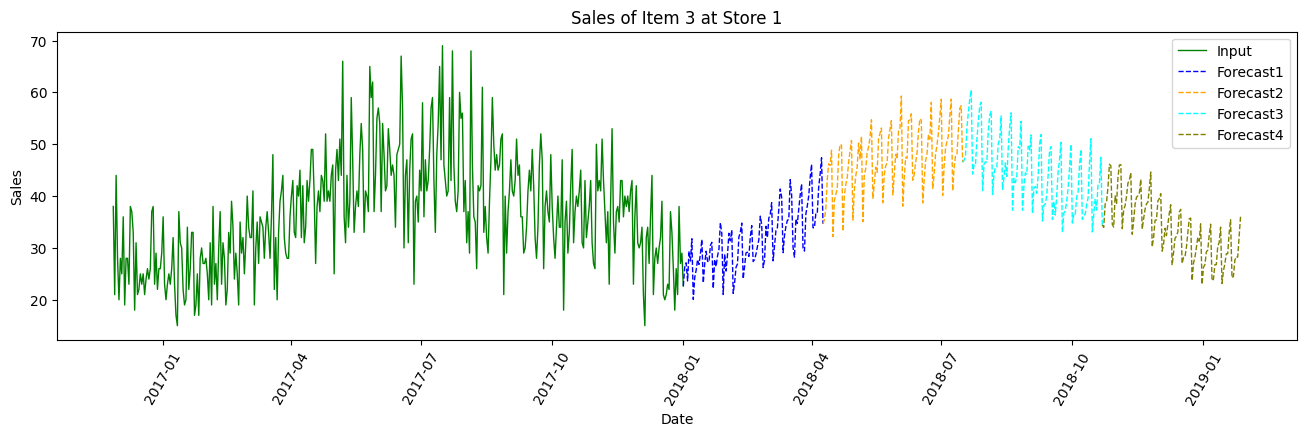

input = [58, 40, 45, 50, 38, 35, 49, 48, 33, 38, 27, 45, 48, 41, 44, 34, 31, 39, 33, 45, 42, 47, 33, 36, 33, 39, 41, 47, 48, 34, 29, 28, 41, 49, 57, 43, 25, 27, 33, 43, 33, 49, 40, 36, 33, 36, 38, 35, 33, 41, 22, 35, 32, 42, 34, 46, 45, 35, 33, 38, 45, 48, 39, 48, 40, 32, 50, 40, 47, 47, 47, 23, 32, 42, 44, 41, 37, 49, 38, 36, 44, 43, 48, 43, 48, 33, 30, 32, 36, 49, 47, 63, 30, 35, 40, 49, 48, 54, 55, 44, 54, 46, 47, 48, 61, 63, 40, 39, 49, 39, 64, 59, 67, 33, 45, 51, 43, 51, 42, 46, 40, 40, 40, 50, 53, 56, 61, 44, 52, 56, 57, 51, 69, 64, 38, 42, 56, 60, 55, 68, 61, 56, 46, 50, 51, 56, 63, 79, 45, 57, 64, 49, 61, 67, 64, 41, 70, 56, 69, 55, 63, 65, 42, 39, 61, 53, 61, 65, 66, 49, 55, 64, 60, 61, 64, 73, 40, 58, 46, 57, 82, 59, 65, 47, 53, 59, 70, 72, 78, 78, 67, 71, 79, 63, 71, 69, 57, 40, 47, 54, 59, 64, 71, 66, 54, 52, 72, 84, 69, 74, 62, 40, 65, 54, 68, 62, 74, 72, 62, 63, 62, 73, 82, 76, 77, 39, 58, 66, 73, 67, 71, 75, 45, 59, 55, 76, 75, 71, 89, 55, 63, 58, 60, 63, 63, 65, 56, 55,

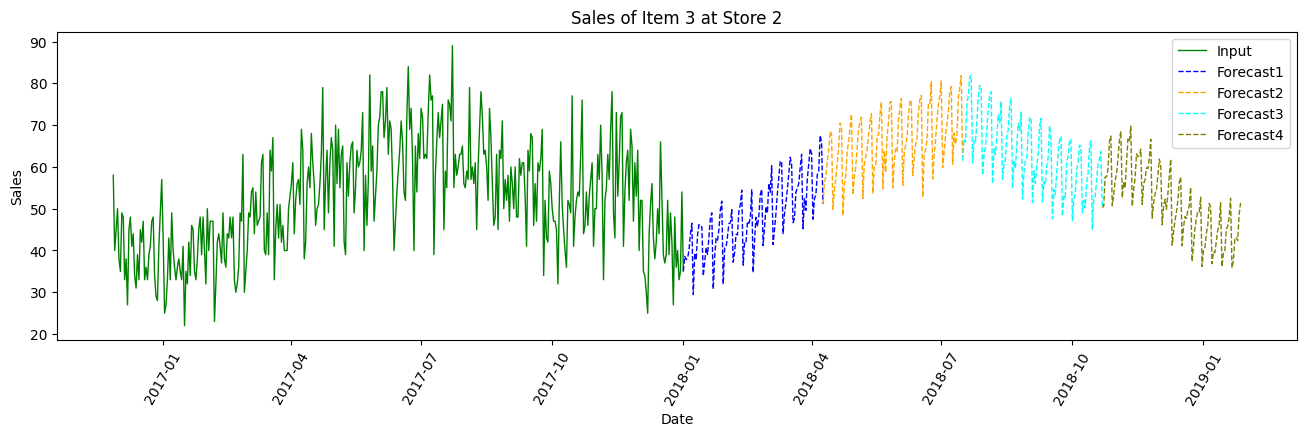

input = [48, 31, 44, 37, 19, 31, 37, 47, 28, 44, 27, 34, 31, 45, 31, 31, 28, 23, 33, 29, 39, 43, 22, 40, 39, 34, 38, 36, 49, 35, 37, 35, 29, 43, 42, 42, 28, 26, 28, 38, 22, 41, 40, 24, 46, 27, 26, 33, 39, 46, 25, 29, 28, 31, 45, 36, 36, 25, 30, 32, 33, 39, 27, 37, 23, 32, 35, 37, 36, 48, 44, 25, 38, 34, 43, 31, 49, 45, 23, 30, 33, 48, 38, 47, 33, 23, 41, 23, 28, 32, 34, 24, 31, 33, 36, 42, 37, 46, 47, 33, 43, 49, 49, 53, 50, 45, 30, 45, 36, 40, 39, 57, 65, 44, 52, 33, 38, 47, 48, 57, 31, 49, 37, 51, 54, 53, 56, 39, 55, 51, 51, 64, 48, 61, 42, 49, 44, 45, 52, 58, 58, 43, 62, 38, 55, 56, 67, 56, 41, 28, 54, 51, 50, 59, 62, 36, 39, 52, 44, 57, 66, 67, 41, 47, 43, 50, 50, 63, 60, 53, 61, 61, 49, 61, 63, 66, 54, 35, 53, 56, 66, 58, 66, 39, 51, 50, 51, 45, 57, 76, 46, 51, 51, 49, 76, 58, 60, 41, 51, 54, 73, 58, 59, 73, 49, 53, 49, 54, 60, 58, 56, 46, 58, 72, 50, 59, 64, 79, 59, 65, 60, 67, 73, 58, 64, 48, 70, 58, 49, 64, 62, 62, 42, 51, 52, 64, 61, 62, 73, 43, 52, 55, 58, 63, 58, 76, 38, 50,

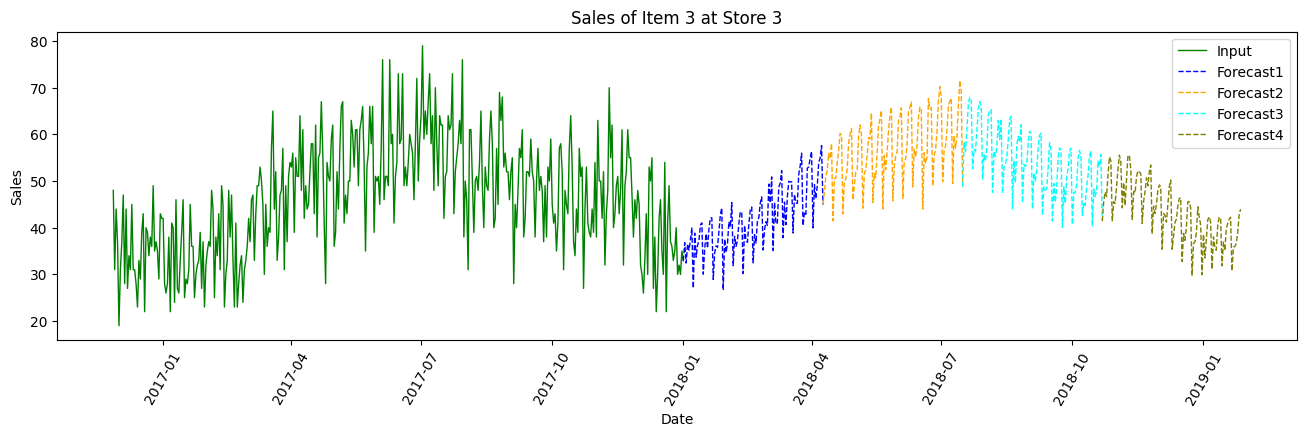

input = [53, 48, 45, 46, 35, 31, 36, 31, 23, 29, 18, 36, 25, 34, 35, 24, 26, 31, 22, 25, 25, 30, 19, 25, 23, 21, 39, 31, 38, 20, 21, 23, 45, 37, 41, 43, 20, 24, 35, 24, 40, 36, 36, 25, 35, 37, 30, 45, 34, 32, 21, 27, 27, 25, 32, 27, 35, 29, 24, 22, 28, 28, 29, 41, 26, 23, 32, 30, 33, 27, 24, 22, 41, 30, 26, 40, 42, 33, 38, 36, 28, 37, 36, 33, 41, 26, 36, 30, 28, 35, 46, 36, 33, 29, 33, 37, 34, 38, 58, 33, 40, 38, 33, 48, 37, 45, 35, 31, 36, 41, 36, 46, 48, 37, 34, 31, 41, 44, 41, 53, 38, 35, 42, 37, 35, 58, 66, 37, 40, 37, 50, 50, 40, 55, 28, 37, 45, 48, 42, 54, 49, 44, 41, 51, 40, 59, 54, 61, 30, 42, 47, 39, 40, 48, 45, 35, 47, 56, 56, 76, 68, 69, 49, 44, 54, 39, 52, 54, 44, 38, 38, 39, 40, 47, 53, 65, 32, 51, 55, 46, 49, 60, 52, 45, 51, 46, 51, 41, 67, 50, 38, 51, 51, 42, 55, 59, 67, 41, 35, 49, 54, 61, 53, 48, 37, 54, 45, 45, 63, 62, 59, 41, 64, 45, 54, 63, 47, 57, 50, 47, 44, 52, 51, 68, 72, 33, 59, 48, 54, 53, 80, 70, 45, 39, 52, 46, 71, 60, 59, 54, 61, 54, 63, 65, 71, 61, 42, 44,

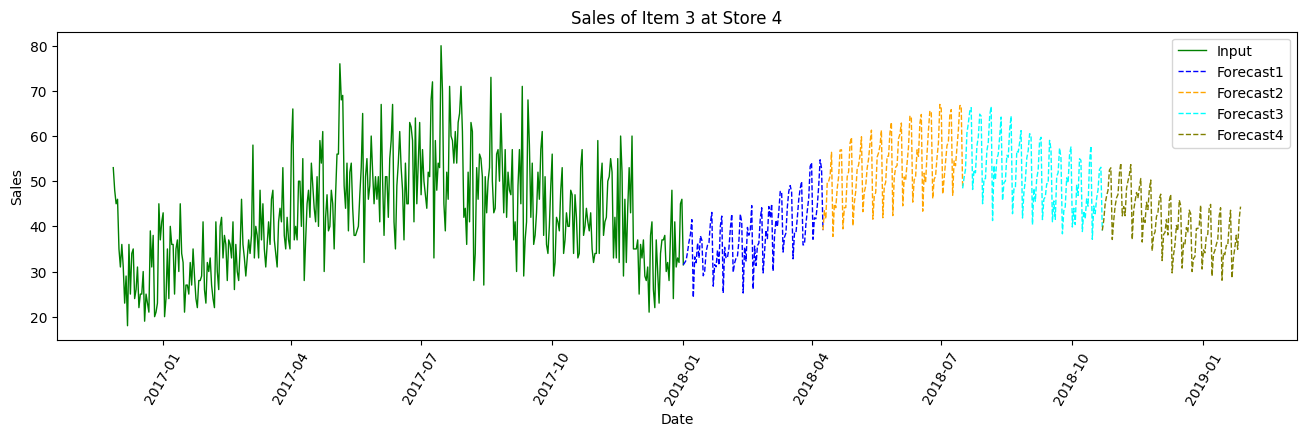

input = [38, 27, 41, 28, 25, 28, 27, 25, 26, 15, 18, 25, 30, 21, 22, 14, 17, 16, 14, 21, 31, 32, 18, 20, 25, 19, 18, 27, 32, 14, 25, 18, 22, 26, 27, 30, 16, 25, 23, 20, 13, 25, 28, 9, 16, 13, 18, 28, 30, 21, 17, 19, 25, 21, 15, 23, 23, 18, 12, 14, 24, 22, 20, 19, 15, 16, 29, 18, 18, 38, 29, 12, 17, 27, 28, 26, 31, 24, 14, 17, 16, 21, 29, 30, 29, 19, 26, 14, 22, 20, 28, 28, 22, 14, 27, 19, 30, 31, 38, 21, 30, 24, 30, 28, 38, 30, 24, 25, 24, 23, 25, 35, 39, 25, 28, 25, 34, 29, 38, 29, 25, 32, 20, 29, 29, 38, 39, 32, 30, 40, 38, 46, 38, 37, 12, 31, 27, 30, 40, 44, 34, 36, 23, 35, 31, 30, 37, 40, 25, 37, 26, 33, 39, 38, 38, 30, 39, 22, 34, 51, 32, 39, 31, 29, 41, 39, 40, 45, 46, 32, 31, 30, 28, 43, 48, 43, 25, 31, 23, 34, 41, 47, 34, 26, 24, 28, 35, 37, 45, 46, 23, 37, 24, 41, 43, 29, 41, 30, 36, 33, 48, 32, 50, 44, 23, 41, 34, 42, 44, 46, 31, 28, 32, 27, 32, 38, 46, 46, 41, 38, 39, 46, 53, 47, 52, 24, 38, 41, 45, 38, 45, 37, 37, 29, 40, 39, 46, 41, 59, 33, 43, 29, 52, 41, 34, 50, 24, 29, 

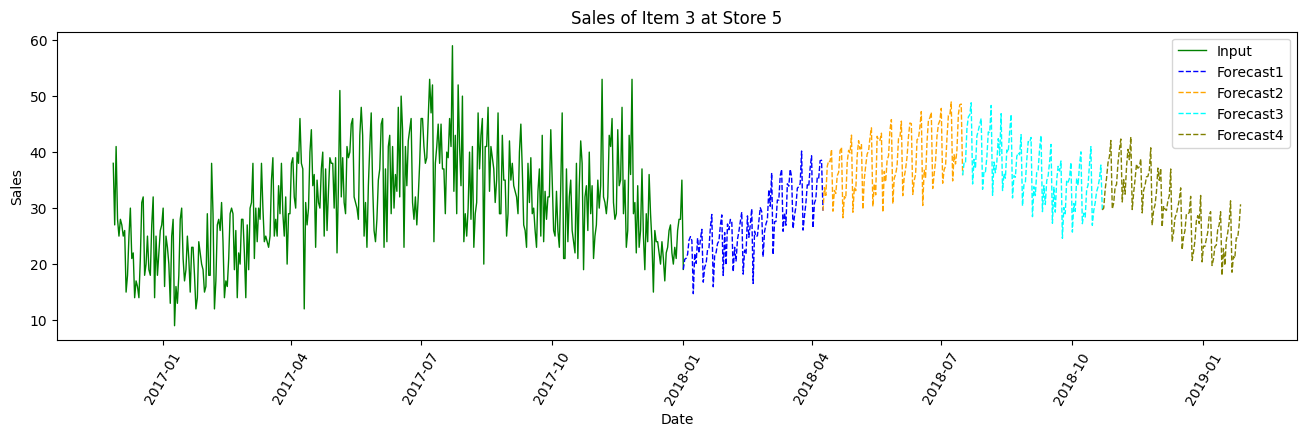

In [ ]:
# Four forecast batches
input_df = pd.read_csv(input_path)
last_date = datetime.strptime(input_df['date'].iloc[-1], '%m/%d/%Y').date()
input_dates = [datetime.strptime(input_df['date'].iloc[i], '%m/%d/%Y').date() for i in range(len(input_df))]

preds_np1 = np.load(output_path1)
preds_df1 = pd.DataFrame(preds_np1, columns=column_names)

preds_np2 = np.load(output_path2)
preds_df2 = pd.DataFrame(preds_np2, columns=column_names)

preds_np3 = np.load(output_path3)
preds_df3 = pd.DataFrame(preds_np3, columns=column_names)

preds_np4 = np.load(output_path4)
preds_df4 = pd.DataFrame(preds_np4, columns=column_names)

preds_len = len(preds_df1)
preds_dates1 = gen_date_list(prev_date=last_date, num_dates=preds_len)
preds_dates2 = gen_date_list(prev_date=preds_dates1[-1], num_dates=preds_len)
preds_dates3 = gen_date_list(prev_date=preds_dates2[-1], num_dates=preds_len)
preds_dates4 = gen_date_list(prev_date=preds_dates3[-1], num_dates=preds_len)
print(preds_dates1)
print(preds_dates2)
print(preds_dates3)
print(preds_dates4)

for item in range(1, 11):
    for store in range(1, 11):
        plot_title = f"Sales of Item {item} at Store {store}"
        item_col = f"it{item}_st{store}"
        print(f"input = {input_df[item_col].to_list()}")
        print(f"preds 1 = {preds_df1[item_col].to_list()}")
        print(f"preds 2 = {preds_df2[item_col].to_list()}")
        print(f"preds 3 = {preds_df3[item_col].to_list()}")
        print(f"preds 4 = {preds_df4[item_col].to_list()}")

        forecast_seqs = [[preds_dates1, preds_df1[item_col].to_list()],
                         [preds_dates2, preds_df2[item_col].to_list()],
                         [preds_dates3, preds_df3[item_col].to_list()],
                         [preds_dates4, preds_df4[item_col].to_list()]]
        visualize_forecast3([input_dates, input_df[item_col].to_list()], forecast_seqs, plot_title, 
                            f"{output_folder}/in_out_batch1_2_3_4_{item_col}.png", show=False)